In [1]:
import pandas as pd
from imdb import IMDb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movies.csv")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.shape

(9742, 3)

In [4]:
r = pd.read_csv("ratings.csv")
r

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
r.shape

(100836, 4)

In [6]:
r['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
df['title'].value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

In [8]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

merged_df = pd.merge(ratings, movies, on='movieId')
ratings_count = merged_df.groupby('title').size().reset_index(name='count')
max_rated_movie = ratings_count.loc[ratings_count['count'].idxmax()]

print(f"The movie with the maximum number of user ratings is: {max_rated_movie['title']} with {max_rated_movie['count']} ratings.")


The movie with the maximum number of user ratings is: Forrest Gump (1994) with 329 ratings.


In [9]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag'].unique()

print(f"The correct tags submitted by users for 'Matrix, The (1999)' are:\n{list(matrix_tags)}")

The correct tags submitted by users for 'Matrix, The (1999)' are:
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [10]:
terminator_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


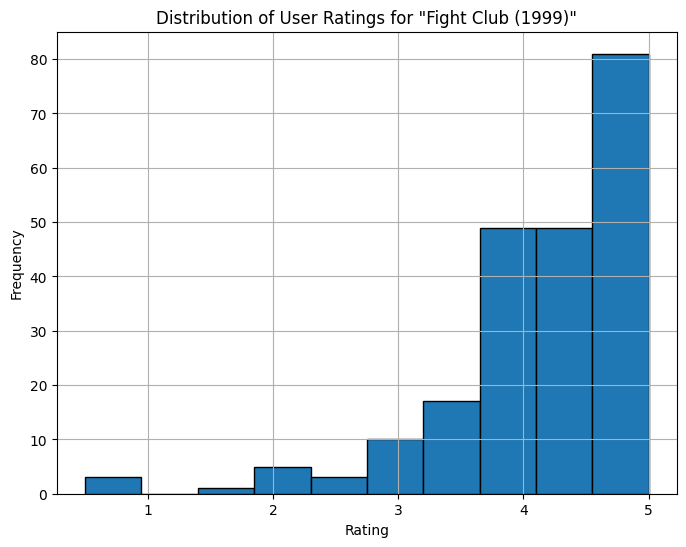

In [11]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter ratings for this movie
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
rating_agg = ratings_df.groupby('movieId').agg(
    count=('rating', 'size'),
    mean_rating=('rating', 'mean')
).reset_index()

popular_movies = rating_agg[rating_agg['count'] > 50]

popular_movies_with_titles = popular_movies.merge(movies_df, on='movieId')

most_popular_movie = popular_movies_with_titles.loc[popular_movies_with_titles['mean_rating'].idxmax()]

print(most_popular_movie)


movieId                                     318
count                                       317
mean_rating                            4.429022
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
Name: 53, dtype: object


In [13]:
# 1. Group by movieId and calculate count of ratings
rating_count = ratings_df.groupby('movieId').size().reset_index(name='count')

# 2. Filter movies with more than 50 ratings
popular_movies = rating_count[rating_count['count'] > 50]

# 3. Join with movies DataFrame
popular_movies_with_titles = popular_movies.merge(movies_df, on='movieId')

# 4. Sort by count and select top 5
top_5_popular_movies = popular_movies_with_titles.sort_values(by='count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'count']])

Top 5 popular movies based on number of user ratings:
                                title  count
61                Forrest Gump (1994)    329
53   Shawshank Redemption, The (1994)    317
49                Pulp Fiction (1994)    307
99   Silence of the Lambs, The (1991)    279
248                Matrix, The (1999)    278


In [14]:

rating_count = ratings_df.groupby('movieId').size().reset_index(name='count')

popular_movies = rating_count[rating_count['count'] > 50]

popular_movies_with_titles = popular_movies.merge(movies_df, on='movieId')

sci_fi_movies = popular_movies_with_titles[popular_movies_with_titles['genres'].str.contains('Sci-Fi')]

third_most_popular_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False).iloc[2]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi['title']} with {third_most_popular_sci_fi['count']} ratings.")

The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993) with 238 ratings.


In [15]:
sci_fi_movies_df = movies_df[movies_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

sci_fi_ratings_df = pd.merge(sci_fi_movies_df, ratings_df, on='movieId')

sci_fi_avg_ratings = sci_fi_ratings_df.groupby(['movieId', 'title'])['rating'].mean().reset_index()

max_rating_sci_fi_movie = sci_fi_avg_ratings.loc[sci_fi_avg_ratings['rating'].idxmax()]

print(f"Movie ID: {max_rating_sci_fi_movie['movieId']}, Title: {max_rating_sci_fi_movie['title']}, Average Rating: {max_rating_sci_fi_movie['rating']}")


Movie ID: 3687, Title: Light Years (Gandahar) (1988), Average Rating: 5.0


In [16]:
avg_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
max_rating_movie = avg_ratings.loc[avg_ratings['rating'].idxmax()]
movie_title = movies_df[movies_df['movieId'] == max_rating_movie['movieId']]['title'].values[0]
print(f"Movie ID: {max_rating_movie['movieId']}, Title: {movie_title}, Average Rating: {max_rating_movie['rating']}")

Movie ID: 53.0, Title: Lamerica (1994), Average Rating: 5.0
